# Assignment 2

**Credits**: Federico Ruggeri, Eleonora Mancini, Paolo Torroni

**Keywords**: Sexism Detection, Multi-class Classification, LLMs, Prompting


# Contact

For any doubt, question, issue or help, you can always contact us at the following email addresses:

Teaching Assistants:

* Federico Ruggeri -> federico.ruggeri6@unibo.it
* Eleonora Mancini -> e.mancini@unibo.it

Professor:

* Paolo Torroni -> p.torroni@unibo.it

# Relevant Material

- Tutorial 3
- Huggingface documentation
- Huggingface hub

# Introduction

You are tasked to address the [EDOS Task B](https://github.com/rewire-online/edos) on sexism detection.

## Problem definition

Given an input text sentence, the task is to label the sentence as not-sexist or one of these four sexist categories: (1) threats, (2)  derogation, (3) animosity, (4) prejudiced discussion.

### Examples:

**Text**: *``Schedule a date with her, then don't show up. Then text her "GOTCHA B___H".''*

**Label**: Threats

**Text**: *``That’s completely ridiculous a woman flashing her boobs is not sexual assault in the slightest.''*

**Label**: Not sexist



## Approach

We will tackle the five-class classification task with LLMs.

In particular, we'll consider zero-/few-shot prompting approaches to assess the capability of some popular open-source LLMs on this task.

## Preliminaries

We are going to download LLMs from [Huggingface](https://huggingface.co/).

Many of these open-source LLMs require you to accept their "Community License Agreement" to download them.

In summary:

- If not already, create an account of Huggingface (~2 mins)
- Check a LLM model card page (e.g., [Mistral v3](https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.3)) and accept its "Community License Agreement".
- Go to your account -> Settings -> Access Tokens -> Create new token -> "Repositories permissions" -> add the LLM model card you want to use.
- Save the token (we'll need it later)

### Huggingface Login

Once we have created an account and an access token, we need to login to Huggingface via code.

- Type your token and press Enter
- You can say No to Github linking

In [1]:
!hf auth login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): Traceback (most recent call last):
  File "/usr/local/bin/hf", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/huggingface_hub/cli/hf.py", line 59, in main
    service.run()
  File "/usr/local/lib/python3.12/dist-

After login, you can download all models associated with your access token in addition to those that are not protected by an access token.

### Data Loading

Since we are only interested in prompting, we do not require a train dataset.

We have preparared a small test set version of EDOS in our dedicated [Github repository](https://github.com/lt-nlp-lab-unibo/nlp-course-material).

Check the ``Assignment 2/data`` folder.
It contains:

- ``a2_test.csv`` → a small test set of 300 samples.
- ``demonstrations.csv`` -> a batch of 1000 samples for few-shot prompting.

Both datasets contain a balanced number of sexist and not sexist samples.


### Instructions

We require you to:

* **Download** the ``A2/data`` folder.
* **Encode** ``a2_test.csv`` into a ``pandas.DataFrame`` object.

# [Task 1 - 0.5 points] Model setup

Once the test data has been loaded, we have to setup the model pipeline for inference.

In particular, we have to:
- Load the model weights from Huggingface
- Quantize the model to fit into a single-GPU limited hardware

## Which LLMs?

The pool of LLMs is ever increasing and it's impossible to keep track of all new entries.

We focus on popular open-source models.

- [Mistral v2](https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.2)
- [Mistral v3](https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.3)
- [Llama v3.1](https://huggingface.co/meta-llama/Llama-3.1-8B-Instruct)
- [Phi3-mini](https://huggingface.co/microsoft/Phi-3-mini-4k-instruct)
- [TinyLlama](https://huggingface.co/TinyLlama/TinyLlama-1.1B-Chat-v1.0)
- [DeepSeek-R1](https://huggingface.co/deepseek-ai/DeepSeek-R1-Distill-Qwen-7B)
- [Qwen3](https://huggingface.co/Qwen/Qwen3-1.7B)

Other open-source models are more than welcome!

### Instructions

In order to get Task 1 points, we require you to:

* Pick 2 model cards from the provided list.
* For each model:
  - Setup a quantization configuration for the model.
  - Load the model via HuggingFace APIs.


### Note

There's a popular library integrated with Huggingface's ``transformers`` to perform quantization.


 **GPU Check and Setup**

In [2]:
import torch
import subprocess
import sys

# Check GPU
print("="*70)
print("GPU SETUP")
print("="*70)
print(f"GPU Available: {torch.cuda.is_available()}")
print(f"GPU Device: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'None'}")

if torch.cuda.is_available():
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
    print(f"CUDA Version: {torch.version.cuda}")
else:
    print("WARNING: No GPU detected! Go to Runtime → Change Runtime Type → GPU")

# Clear cache
if torch.cuda.is_available():
    torch.cuda.empty_cache()
    print("\n GPU cache cleared")

GPU SETUP
GPU Available: True
GPU Device: Tesla T4
GPU Memory: 15.83 GB
CUDA Version: 12.6

 GPU cache cleared


**Install Required Libraries:**

In [3]:
import subprocess
import sys

packages = [
    "transformers>=4.36.0",
    "bitsandbytes>=0.39.0",
    "accelerate>=0.24.0",
    "scikit-learn",
    "pandas",
    "matplotlib",
    "seaborn"
]

print("Installing/upgrading packages...")
for package in packages:
    print(f"  → {package}...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "-U", package])

print("\n All packages installed!")

# Verify key packages
import transformers
import bitsandbytes
print(f"\n transformers: {transformers.__version__}")
print(f" bitsandbytes: {bitsandbytes.__version__}")

Installing/upgrading packages...
  → transformers>=4.36.0...
  → bitsandbytes>=0.39.0...
  → accelerate>=0.24.0...
  → scikit-learn...
  → pandas...
  → matplotlib...
  → seaborn...

 All packages installed!

 transformers: 4.57.1
 bitsandbytes: 0.48.2


**Imports**

In [4]:
import torch
import pandas as pd
import numpy as np
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

print(" All imports successful!")

 All imports successful!


**Download and Load Data**

In [5]:
import os
import urllib.request

# Create data directory
os.makedirs('data', exist_ok=True)

# Download files
test_csv_url = "https://raw.githubusercontent.com/lt-nlp-lab-unibo/nlp-course-material/main/2025-2026/Assignment%202/data/a2_test.csv"
demo_csv_url = "https://raw.githubusercontent.com/lt-nlp-lab-unibo/nlp-course-material/main/2025-2026/Assignment%202/data/demonstrations.csv"

print("Downloading files...")
try:
    urllib.request.urlretrieve(test_csv_url, 'data/a2_test.csv')
    print(" a2_test.csv downloaded")
except Exception as e:
    print(f" Error: {e}")

try:
    urllib.request.urlretrieve(demo_csv_url, 'data/demonstrations.csv')
    print(" demonstrations.csv downloaded")
except Exception as e:
    print(f" Error: {e}")

print("\n" + "="*70)

# Load test data
test_df = pd.read_csv('data/a2_test.csv')
print(f"\n Test dataset loaded!")
print(f"  Shape: {test_df.shape}")

test_df = test_df[['text', 'label_category']].copy()
test_df.rename(columns={'label_category': 'label'}, inplace=True)

# Robust label mapping
def map_label(label):
    """Map label strings to integers"""
    if pd.isna(label):
        return 0

    label_str = str(label).lower().strip()

    if 'not' in label_str:
        return 0
    elif 'threat' in label_str:
        return 1
    elif 'derogat' in label_str:
        return 2
    elif 'animosit' in label_str:
        return 3
    elif 'prejudic' in label_str:
        return 4
    else:
        return 0

test_df['label'] = test_df['label'].apply(map_label)

print(f"\n Class distribution:")
print(test_df['label'].value_counts().sort_index())

# Load demonstrations
demonstrations_df = pd.read_csv('data/demonstrations.csv')
demonstrations_df = demonstrations_df[['text', 'label_category']].copy()
demonstrations_df.rename(columns={'label_category': 'label'}, inplace=True)
demonstrations_df['label'] = demonstrations_df['label'].apply(map_label)

print(f"\n Demonstrations class distribution:")
print(demonstrations_df['label'].value_counts().sort_index())

print("\n" + "="*70)
print(f" Data loaded successfully!")

 a2_test.csv downloaded
 demonstrations.csv downloaded


 Test dataset loaded!
  Shape: (300, 3)

 Class distribution:
label
0    60
1    60
2    60
3    60
4    60
Name: count, dtype: int64

 Demonstrations class distribution:
label
0    200
1    200
2    200
3    200
4    200
Name: count, dtype: int64

 Data loaded successfully!


**Model Setup**

In [6]:
MODEL_1_NAME = "microsoft/Phi-3-mini-4k-instruct"

print(f"Loading Model 1: {MODEL_1_NAME}...")

quantization_config = BitsAndBytesConfig(
    load_in_8bit=True,
    bnb_8bit_compute_dtype=torch.float16,
    bnb_8bit_use_double_quant=True,
)

# Load tokenizer
tokenizer_1 = AutoTokenizer.from_pretrained(
    MODEL_1_NAME,
    trust_remote_code=True
)
tokenizer_1.pad_token = tokenizer_1.eos_token
print("   Tokenizer loaded")

# Load model with 8-bit quantization
model_1 = AutoModelForCausalLM.from_pretrained(
    MODEL_1_NAME,
    quantization_config=quantization_config,
    device_map="auto",
    trust_remote_code=True
)

print(f"   Model loaded with 8-bit quantization")
print(f"   Model dtype: {model_1.dtype}")
print(f"   Device: {next(model_1.parameters()).device}")

# Clear cache
torch.cuda.empty_cache()
print("   GPU cache cleared")

Loading Model 1: microsoft/Phi-3-mini-4k-instruct...


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/306 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/599 [00:00<?, ?B/s]

   Tokenizer loaded


config.json:   0%|          | 0.00/967 [00:00<?, ?B/s]

configuration_phi3.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-4k-instruct:
- configuration_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi3.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-4k-instruct:
- modeling_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

   Model loaded with 8-bit quantization
   Model dtype: torch.float16
   Device: cuda:0
   GPU cache cleared


In [7]:
MODEL_2_NAME = "mistralai/Mistral-7B-Instruct-v0.3"

print(f"Loading Model 2: {MODEL_2_NAME}...")


quantization_config = BitsAndBytesConfig(
    load_in_8bit=True,
    bnb_8bit_compute_dtype=torch.float16,
    bnb_8bit_use_double_quant=True,
)

# Load tokenizer
tokenizer_2 = AutoTokenizer.from_pretrained(
    MODEL_2_NAME,
    trust_remote_code=True
)
tokenizer_2.pad_token = tokenizer_2.eos_token
print("   Tokenizer loaded")

# Load model with 8-bit quantization
model_2 = AutoModelForCausalLM.from_pretrained(
    MODEL_2_NAME,
    quantization_config=quantization_config,
    device_map="auto",
    trust_remote_code=True
)

print(f"   Model loaded with 8-bit quantization")
print(f"   Model dtype: {model_2.dtype}")
print(f"   Device: {next(model_2.parameters()).device}")

# Clear cache
torch.cuda.empty_cache()
print("   GPU cache cleared")

Loading Model 2: mistralai/Mistral-7B-Instruct-v0.3...


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/587k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

   Tokenizer loaded


config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.55G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

   Model loaded with 8-bit quantization
   Model dtype: torch.float16
   Device: cuda:0
   GPU cache cleared


# [Task 2 - 1.0 points] Prompt setup

Prompting requires an input pre-processing phase where we convert each input example into a specific instruction prompt.


## Prompt Template

Use the following prompt template to process input texts.

In [8]:
prompt = [
    {
        'role': 'system',
        'content': 'You are an annotator for sexism detection.'
    },
    {
        'role': 'user',
        'content': """Your task is to classify input text as not-sexist
         or sexist. If sexist, classify input text according to one
         of the following four categories: threats, derogation,
         animosity, prejudiced discussion.

         Below you find sexist categories definitions:
         Threats: the text expresses intent or desire to harm a woman.
         Derogation: the text describes a woman in a derogative manner.
         Animosity: the text contains slurs or insults towards a woman.
         Prejudiced discussion: the text expresses supports for
         mistreatment of women as individuals.

         Respond only by writing one of the following categories:
         not-sexist, threats, derogation, animosity, prejudiced.

        TEXT: {text}

        ANSWER:
        """
    }
]


**Define Prompt Templates**

In [9]:
# Zero-shot prompt template
PROMPT_TEMPLATE = [
    {
        'role': 'system',
        'content': 'You are an annotator for sexism detection.'
    },
    {
        'role': 'user',
        'content': """Your task is to classify input text as not-sexist
         or sexist. If sexist, classify input text according to one
         of the following four categories: threats, derogation,
         animosity, prejudiced discussion.

         Below you find sexist categories definitions:
         Threats: the text expresses intent or desire to harm a woman.
         Derogation: the text describes a woman in a derogatory manner.
         Animosity: the text contains slurs or insults towards a woman.
         Prejudiced discussion: the text expresses support for
         mistreatment of women as individuals.

         Respond only by writing one of the following categories:
         not-sexist, threats, derogation, animosity, prejudiced.

        TEXT: {text}

        ANSWER:
        """
    }
]

# Few-shot prompt template
FEW_SHOT_PROMPT_TEMPLATE = [
    {
        'role': 'system',
        'content': 'You are an annotator for sexism detection.'
    },
    {
        'role': 'user',
        'content': """Your task is to classify input text as not-sexist
         or sexist. If sexist, classify input text according to one
         of the following four categories: threats, derogation,
         animosity, prejudiced discussion.

         Below you find sexist categories definitions:
         Threats: the text expresses intent or desire to harm a woman.
         Derogation: the text describes a woman in a derogatory manner.
         Animosity: the text contains slurs or insults towards a woman.
         Prejudiced discussion: the text expresses support for
         mistreatment of women as individuals.

         Respond only by writing one of the following categories:
         not-sexist, threats, derogation, animosity, prejudiced.

        EXAMPLES:
{examples}

        TEXT: {text}

        ANSWER:
        """
    }
]

print("✓ Prompt templates defined!")

✓ Prompt templates defined!


### Instructions

In order to get Task 2 points, we require you to:

* Write a ``prepare_prompts`` function as the one reported below.

In [10]:
def prepare_prompts(texts, prompt_template, tokenizer):
  """
    This function format input text samples into instructions prompts.

    Inputs:
      texts: input texts to classify via prompting
      prompt_template: the prompt template provided in this assignment
      tokenizer: the transformers Tokenizer object instance associated
      with the chosen model card

    Outputs:
      input texts to classify in the form of instruction prompts
  """
  prompts = []
  for text in texts:
    prompt_copy = [msg.copy() for msg in prompt_template]
    prompt_copy[-1]['content'] = prompt_copy[-1]['content'].format(text=text)
    formatted_prompt = tokenizer.apply_chat_template(
            prompt_copy,
            tokenize=False, # We want the final string, not token IDs
            add_generation_prompt=True # Add the appropriate prompt/separator to start generation
        )
    prompts.append(formatted_prompt)
  return prompts

### Notes

1. You are free to modify the prompt format (**not its content**) as you like depending on your code implementation.

2. Note that the provided prompt has placeholders. You need to format the string to replace placeholders. Huggingface might have dedicated APIs for this.

**Prepare Prompts Function**

In [11]:
def prepare_prompts(texts, prompt_template, tokenizer, examples=None):
    """Format input text samples into instruction prompts."""
    prompts = []

    for text in texts:
        prompt_copy = [msg.copy() for msg in prompt_template]

        if examples:
            prompt_copy[-1]['content'] = prompt_copy[-1]['content'].format(
                text=text,
                examples=examples
            )
        else:
            prompt_copy[-1]['content'] = prompt_copy[-1]['content'].format(text=text)

        formatted_prompt = tokenizer.apply_chat_template(
            prompt_copy,
            tokenize=False,
            add_generation_prompt=True
        )

        prompts.append(formatted_prompt)

    return prompts

print("Prepare prompts function defined!")

Prepare prompts function defined!


# [Task 3 - 1.0 points] Inference

We are now ready to define the inference loop where we prompt the model with each pre-processed sample.

### Instructions

In order to get Task 3 points, we require you to:

* Write a ``generate_responses`` function as the one reported below.
* Write a ``process_response`` function as the one reported below.

In [12]:
def generate_responses(model, prompt_examples):
  """
    This function implements the inference loop for a LLM model.
    Given a set of examples, the model is tasked to generate
    a response.

    Inputs:
      model: LLM model instance for prompting
      prompt_examples: pre-processed text samples

    Outputs:
      generated responses
  """
  pass

In [13]:
def process_response(response):
  """
    This function takes a textual response generated by the LLM
    and processes it to map the response to a binary label.

    Inputs:
      response: generated response from LLM

    Outputs:
      parsed classification response.
      Use the following mapping:
      {
        'not-sexist': 0,
        'threats': 1,
        'derogation': 2,
        'animosity': 3,
        'prejudiced': 4
      }
  """
  pass

## Notes

1. According to our tests, it should take you ~10 mins to perform full inference on 300 samples on Colab.

**Generate Responses Function**

In [14]:
def generate_responses(model, tokenizer, prompts, max_new_tokens=100, batch_size=4):
    """Generate LLM responses for prompts (Colab-optimized)."""
    responses = []
    model.eval()

    total_batches = (len(prompts) + batch_size - 1) // batch_size

    with torch.no_grad():
        for batch_idx in range(0, len(prompts), batch_size):
            batch_prompts = prompts[batch_idx:batch_idx+batch_size]

            inputs = tokenizer(
                batch_prompts,
                return_tensors="pt",
                padding=True,
                truncation=True,
                max_length=1024
            ).to(model.device)

            outputs = model.generate(
                **inputs,
                max_new_tokens=max_new_tokens,
                do_sample=True,
                top_p=0.95,
                temperature=0.7,
                pad_token_id=tokenizer.eos_token_id,
                use_cache=False
            )

            for i, output in enumerate(outputs):
                input_length = inputs['input_ids'][i].shape[0]
                generated_tokens = output[input_length:]
                generated_text = tokenizer.decode(generated_tokens, skip_special_tokens=True).strip()
                responses.append(generated_text)

            current_batch = (batch_idx // batch_size) + 1
            print(f"  Batch {current_batch}/{total_batches} completed")

    return responses

**Process Response Function**

In [15]:
def process_response(response):
    """Parse LLM response to classification label."""
    label_map = {
        'not-sexist': 0, 'not sexist': 0, 'non-sexist': 0, 'non sexist': 0,
        'threats': 1, 'threat': 1,
        'derogation': 2, 'derogatory': 2,
        'animosity': 3, 'hostile': 3,
        'prejudiced': 4, 'prejudice': 4, 'prejudiced discussion': 4
    }

    response_lower = response.lower().strip()

    for key, value in label_map.items():
        if key in response_lower:
            return value

    if 'threat' in response_lower:
        return 1
    elif 'derogat' in response_lower:
        return 2
    elif 'animosit' in response_lower or 'hostile' in response_lower:
        return 3
    elif 'prejudic' in response_lower:
        return 4

    return 0

**Zero-shot Inference**

In [16]:
ALL_ZERO_SHOT_RESULTS = {}
label_names = ['not-sexist', 'threats', 'derogation', 'animosity', 'prejudiced']

def run_zero_shot_inference(model, tokenizer, model_name, model_alias, batch_size=8):
    """Encapsulates the zero-shot inference pipeline for a single model."""

    print("\n" + "="*70)
    print(f"TASK 3: ZERO-SHOT INFERENCE ({model_alias})")
    print("="*70)

    zero_shot_prompts = prepare_prompts(test_df['text'].tolist(), PROMPT_TEMPLATE, tokenizer)

    responses = generate_responses(model, tokenizer, zero_shot_prompts, batch_size=batch_size)

    predictions = [process_response(resp) for resp in responses]

    # Store Results
    results = {
        'model_name': model_name,
        'responses': responses,
        'predictions': predictions,
        'prompts': zero_shot_prompts
    }

    print(f"\nZero-shot inference completed for {model_alias}!")

    # Show Sample Results
    print(f"\nSample Results (first 3):")
    print("   " + "-"*60)

    for i in range(min(3, len(test_df))):
        # We need a robust way to map the text label back to an index for display
        def get_label_index(label_str):
            try:
                return label_names.index(label_str)
            except ValueError:
                return 0 # Default to not-sexist if prediction is unknown

        true_label_str = label_names[int(test_df.iloc[i]['label'])]
        pred_label_str = predictions[i]

        print(f"\n   Sample {i+1}:")
        print(f"   Text: {test_df.iloc[i]['text'][:60]}...")
        print(f"   True: {true_label_str}, Pred: {pred_label_str}")
        print(f"   Raw Response: '{responses[i]}'")

    # Clear cache for next model
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        print("\n   GPU cache cleared")

    return results

# --- Run Inference for Model 1 (Phi-3) ---
ALL_ZERO_SHOT_RESULTS['model_1'] = run_zero_shot_inference(
    model_1,
    tokenizer_1,
    MODEL_1_NAME,
    "Phi-3-mini"
)
ALL_ZERO_SHOT_RESULTS['model_2'] = run_zero_shot_inference(
    model_2,
    tokenizer_2,
    MODEL_2_NAME,
    "Mistral-7B"
)

print("\n" + "="*70)
print("ALL ZERO-SHOT INFERENCE COMPLETE")
print("="*70)


TASK 3: ZERO-SHOT INFERENCE (Phi-3-mini)


  Batch 1/38 completed
  Batch 2/38 completed
  Batch 3/38 completed
  Batch 4/38 completed
  Batch 5/38 completed
  Batch 6/38 completed
  Batch 7/38 completed
  Batch 8/38 completed
  Batch 9/38 completed
  Batch 10/38 completed
  Batch 11/38 completed
  Batch 12/38 completed
  Batch 13/38 completed
  Batch 14/38 completed
  Batch 15/38 completed
  Batch 16/38 completed
  Batch 17/38 completed
  Batch 18/38 completed
  Batch 19/38 completed
  Batch 20/38 completed
  Batch 21/38 completed
  Batch 22/38 completed
  Batch 23/38 completed
  Batch 24/38 completed
  Batch 25/38 completed
  Batch 26/38 completed
  Batch 27/38 completed
  Batch 28/38 completed
  Batch 29/38 completed
  Batch 30/38 completed
  Batch 31/38 completed
  Batch 32/38 completed
  Batch 33/38 completed
  Batch 34/38 completed
  Batch 35/38 completed
  Batch 36/38 completed
  Batch 37/38 completed
  Batch 38/38 completed

Zero-shot inference completed for Phi-3-mini!

Sample Results (first 3):
   --------------------

# [Task 4 - 0.5 points] Metrics

In order to evaluate selected LLMs, we need to compute performance metrics.

We compute **macro F1-score** and the ratio of failed responses generated by models (**fail-ratio**).

That is, how frequent the LLM fails to follow instructions and provides incorrect responses that do not address the classification task.

In summary, we parse generated responses as follows:
- **0** if 'not-sexist'
- **1** if 'threats'
- **2** if 'derogation'
- **3** if 'animosity'
- **4** if 'prejudiced'
- **0** if the model does not answer in either way

### Instructions

In order to get Task 4 points, we require you to:

* Write a ``compute_metrics`` function as the one reported below.
* Compute metrics for the two selected LLMs.

In [20]:
def compute_metrics(y_pred, y_true):
  """
    This function takes predicted and ground-truth labels and compute
    metrics. In particular, this function compute accuracy and
    fail-ratio metrics. This function internally invokes
    `process_response` to compute metrics.

    Inputs:
      y_pred: parsed LLM responses
      y_true: ground-truth binary labels

    Outputs:
      dictionary containing desired metrics
  """
  pass

**Compute Metrics Function**

In [21]:
def compute_metrics(y_pred, y_true):
    """Compute classification metrics."""
    assert len(y_pred) == len(y_true), "Length mismatch"

    macro_f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
    accuracy = accuracy_score(y_true, y_pred)

    class_names = ['not-sexist', 'threats', 'derogation', 'animosity', 'prejudiced']

    return {
        'macro_f1': macro_f1,
        'accuracy': accuracy,
        'classification_report': classification_report(
            y_true, y_pred,
            target_names=class_names,
            zero_division=0,
            digits=4
        ),
        'confusion_matrix': confusion_matrix(y_true, y_pred)
    }

**Compute Zero-shot Metrics**

In [22]:
print("\n" + "="*70)
print("TASK 4: METRICS COMPUTATION (ZERO-SHOT)")
print("="*70)

# Extract true labels as integers from the test DataFrame
y_true = test_df['label'].tolist()

# Model 1 (Phi-3) Metrics
model_1_results = ALL_ZERO_SHOT_RESULTS['model_1']
model_1_preds = model_1_results['predictions']

print(f"\nComputing zero-shot metrics for Model 1 ({model_1_results['model_name'].split('/')[-1]})...")
metrics_model_1 = compute_metrics(model_1_preds, y_true)

print(f"\nModel 1 Zero-shot Performance:")
print(f"  Accuracy: {metrics_model_1['accuracy']:.4f}")
print(f"  Macro F1: {metrics_model_1['macro_f1']:.4f}")

print(f"\nClassification Report (Model 1):")
print(metrics_model_1['classification_report'])


# Model 2 (Mistral) Metrics
model_2_results = ALL_ZERO_SHOT_RESULTS['model_2']
model_2_preds = model_2_results['predictions']

print(f"\nComputing zero-shot metrics for Model 2 ({model_2_results['model_name'].split('/')[-1]})...")
metrics_model_2 = compute_metrics(model_2_preds, y_true)

print(f"\nModel 2 Zero-shot Performance:")
print(f"  Accuracy: {metrics_model_2['accuracy']:.4f}")
print(f"  Macro F1: {metrics_model_2['macro_f1']:.4f}")

print(f"\nClassification Report (Model 2):")
print(metrics_model_2['classification_report'])

# Store results
METRICS_ZERO_SHOT = {
    'model_1': metrics_model_1,
    'model_2': metrics_model_2
}

print(f"\nMetrics computation completed for both models!")


TASK 4: METRICS COMPUTATION (ZERO-SHOT)

Computing zero-shot metrics for Model 1 (Phi-3-mini-4k-instruct)...

Model 1 Zero-shot Performance:
  Accuracy: 0.4467
  Macro F1: 0.4365

Classification Report (Model 1):
              precision    recall  f1-score   support

  not-sexist     0.6486    0.4000    0.4948        60
     threats     0.5846    0.6333    0.6080        60
  derogation     0.2973    0.1833    0.2268        60
   animosity     0.3000    0.3500    0.3231        60
  prejudiced     0.4396    0.6667    0.5298        60

    accuracy                         0.4467       300
   macro avg     0.4540    0.4467    0.4365       300
weighted avg     0.4540    0.4467    0.4365       300


Computing zero-shot metrics for Model 2 (Mistral-7B-Instruct-v0.3)...

Model 2 Zero-shot Performance:
  Accuracy: 0.3767
  Macro F1: 0.3468

Classification Report (Model 2):
              precision    recall  f1-score   support

  not-sexist     0.7727    0.2833    0.4146        60
     threats 

# [Task 5 - 1.0 points] Few-shot Inference

So far, we have tested models in a zero-shot fashion: we provide the input text to classify and instruct the model to generate a response.

We are now interested in performing few-shot prompting to see the impact of providing demonstration examples.

To do so, we slightly change the prompt template as follows.

In [23]:
prompt = [
    {
        'role': 'system',
        'content': 'You are an annotator for sexism detection.'
    },
    {
        'role': 'user',
        'content': """Your task is to classify input text as not-sexist
         or sexist. If sexist, classify input text according to one
         of the following four categories: threats, derogation,
         animosity, prejudiced discussion.

         Below you find sexist categories definitions:
         Threats: the text expresses intent or desire to harm a woman.
         Derogation: the text describes a woman in a derogative manner.
         Animosity: the text contains slurs or insults towards a woman.
         Prejudiced discussion: the text expresses supports for
         mistreatment of women as individuals.

         Respond only by writing one of the following categories:
         not-sexist, threats, derogation, animosity, prejudiced.

        EXAMPLES: {examples}

        TEXT: {text}

        ANSWER:
        """
    }
]

The new prompt template reports some demonstration examples to instruct the model.

Generally, we provide an equal number of demonstrations per class as shown in the example below.

In [24]:
prompt = [
    {
        'role': 'system',
        'content': 'You are an annotator for sexism detection.'
    },
    {
        'role': 'user',
        'content': """Your task is to classify input text as not-sexist
         or sexist. If sexist, classify input text according to one
         of the following four categories: threats, derogation,
         animosity, prejudiced discussion.

         Below you find sexist categories definitions:
         Threats: the text expresses intent or desire to harm a woman.
         Derogation: the text describes a woman in a derogative manner.
         Animosity: the text contains slurs or insults towards a woman.
         Prejudiced discussion: the text expresses supports for
         mistreatment of women as individuals.

         Respond only by writing one of the following categories:
         not-sexist, threats, derogation, animosity, prejudiced.

         EXAMPLES:
         TEXT: **example 1**
         ANSWER: threats
         TEXT: **example 2**
         ANSWER: not-sexist

         TEXT: {text}

        ANSWER:
        """
    }
]

## Instructions

In order to get Task 5 points, we require you to:

- Load ``demonstrations.csv`` and encode it into a ``pandas.DataFrame`` object.
- Define a ``build_few_shot_demonstrations`` function as the one reported below.
- Modify ``prepare_prompts`` to support demonstrations.
- Perform few-shot inference as in Task 3.
- Compute metrics as in Task 4.

In [25]:
import random
import pandas as pd
random.seed(42)

In [26]:
def build_few_shot_demonstrations(demonstrations, num_per_class=2):
  """
    Selects a balanced set of examples from the demonstrations DataFrame
    and formats them into a single list of demonstrations to be injected
    into the prompt template.
    Inputs:
      demonstrations: DataFrame wrapping demonstrations.csv
      num_per_class: number of demonstrations per class

    Outputs:
      list of demonstrations to inject into the prompt template.
  """
  int_to_label = {
        0: 'not-sexist',
        1: 'threats',
        2: 'derogation',
        3: 'animosity',
        4: 'prejudiced',
    }
  demonstrations_list = []
  for label_int, group in demonstrations.groupby('label'):
        # Ensure we don't try to sample more than available rows in that class
        sample = group.sample(min(num_per_class, len(group)), random_state=42)
        demonstrations_list.extend(sample.to_dict('records'))
  random.shuffle(demonstrations_list)
  examples_string = ""
  for demo in demonstrations_list:
      text = demo['text']
      # Convert integer label to string label for the ANSWER section
      answer = int_to_label.get(demo['label'], 'not-sexist')

      # This formatting must match what the FEW_SHOT_PROMPT_TEMPLATE expects for the {examples} placeholder
      examples_string += f"TEXT: {text}\n"
      examples_string += f"ANSWER: {answer}\n\n"

  return examples_string.strip()

In [27]:
NUM_EXAMPLES_PER_CLASS = 2
FEW_SHOT_EXAMPLES = build_few_shot_demonstrations(demonstrations_df, num_per_class=NUM_EXAMPLES_PER_CLASS)
print("="*70)
print(f"Few-Shot Demonstrations Built ({NUM_EXAMPLES_PER_CLASS} per class)")
print("="*70)
print(f"Total Examples: {len(FEW_SHOT_EXAMPLES.split('TEXT:')) - 1}")
print("\nSample of the formatted demonstration string:")
print("-" * 50)
print('\n'.join(FEW_SHOT_EXAMPLES.split('\n')[:8]))
print("-" * 50)

Few-Shot Demonstrations Built (2 per class)
Total Examples: 10

Sample of the formatted demonstration string:
--------------------------------------------------
TEXT: I heard it as the 6 of 6: * 6 months out of a relationship * 6 ft or taller * 6 figure income * 6 pack * 6” or greater * 600 hp+ vehicle In any event, the number of superficial connections makes that top tier appear attainable to these thots.
ANSWER: animosity

TEXT: I'd just pretend to get locked down, set a wedding date, get her pregnant, then leave the country. Nobody is going to extradite me based on that horseshit allegation.
ANSWER: threats

TEXT: Two things. 1st is when a woman posts that, she's saying she's ignorant. Ignorance is the lack of awareness. 2nd is a little thug in him is an invitation to slap her around, you know, just a little.
ANSWER: threats
--------------------------------------------------


In [28]:
ALL_FEW_SHOT_RESULTS = {}
y_true = test_df['label'].tolist() # True labels for metric calculation

def run_few_shot_inference(model, tokenizer, model_name, model_alias, few_shot_examples, batch_size=2):
    """Executes few-shot inference, processes responses, and computes metrics."""

    print("\n" + "="*70)
    print(f"TASK 5: FEW-SHOT INFERENCE AND METRICS ({model_alias})")
    print("="*70)

    # A. Prepare Prompts
    print(f"\n1. Preparing {len(test_df)} few-shot prompts...")
    few_shot_prompts = prepare_prompts(
        test_df['text'].tolist(),
        FEW_SHOT_PROMPT_TEMPLATE,
        tokenizer,
        examples=few_shot_examples
    )

    responses = generate_responses(model, tokenizer, few_shot_prompts, batch_size=batch_size)
    predictions = [process_response(resp) for resp in responses]

    metrics = compute_metrics(predictions, y_true)

    results = {
        'model_name': model_name,
        'responses': responses,
        'predictions': predictions,
        'prompts': few_shot_prompts
    }

    print(f"\nModel {model_alias} Few-shot Performance:")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Macro F1: {metrics['macro_f1']:.4f}")

    print(f"\nClassification Report (Model {model_alias}):")
    print(metrics['classification_report'])

    # Clear cache
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        print("\n   GPU cache cleared")

    return metrics, results

# Run Few-Shot Inference for Model 1 (Phi-3)
metrics_model_1_fs, ALL_FEW_SHOT_RESULTS['model_1'] = run_few_shot_inference(
    model_1,
    tokenizer_1,
    MODEL_1_NAME,
    "Model 1 (Phi-3)",
    FEW_SHOT_EXAMPLES
)

# Run Few-Shot Inference for Model 2 (Mistral-7B-v0.3)
metrics_model_2_fs, ALL_FEW_SHOT_RESULTS['model_2'] = run_few_shot_inference(
    model_2,
    tokenizer_2,
    MODEL_2_NAME,
    "Model 2 (Mistral)",
    FEW_SHOT_EXAMPLES
)

# Store Few-Shot Metrics
METRICS_FEW_SHOT = {
    'model_1': metrics_model_1_fs,
    'model_2': metrics_model_2_fs
}

print("\n" + "="*70)
print("ALL FEW-SHOT INFERENCE AND EVALUATION COMPLETE")
print("="*70)


TASK 5: FEW-SHOT INFERENCE AND METRICS (Model 1 (Phi-3))

1. Preparing 300 few-shot prompts...
  Batch 1/150 completed
  Batch 2/150 completed
  Batch 3/150 completed
  Batch 4/150 completed
  Batch 5/150 completed
  Batch 6/150 completed
  Batch 7/150 completed
  Batch 8/150 completed
  Batch 9/150 completed
  Batch 10/150 completed
  Batch 11/150 completed
  Batch 12/150 completed
  Batch 13/150 completed
  Batch 14/150 completed
  Batch 15/150 completed
  Batch 16/150 completed
  Batch 17/150 completed
  Batch 18/150 completed
  Batch 19/150 completed
  Batch 20/150 completed
  Batch 21/150 completed
  Batch 22/150 completed
  Batch 23/150 completed
  Batch 24/150 completed
  Batch 25/150 completed
  Batch 26/150 completed
  Batch 27/150 completed
  Batch 28/150 completed
  Batch 29/150 completed
  Batch 30/150 completed
  Batch 31/150 completed
  Batch 32/150 completed
  Batch 33/150 completed
  Batch 34/150 completed
  Batch 35/150 completed
  Batch 36/150 completed
  Batch 37/15

## Notes

1. You are free to pick any value for ``num_per_class``.

2. According to our tests, few-shot prompting increases inference time by some minutes (we experimented with ``num_per_class`` $\in [2, 4]$).

# [Task 6 - 1.0 points] Error Analysis

We are now interested in evaluating model responses and comparing their performance.

This analysis helps us in understanding

- Classification task performance gap: are the models good at this task?
- Generation quality: which kind of responses do models generate?
- Errors: which kind of mistakes do models do?

### Instructions

In order to get Task 6 points, we require you to:

* Compare classification performance of selected LLMs in a Table.
* Compute confusion matrices for selected LLMs.
* Briefly summarize your observations on generated responses.

In [29]:

comparison_data = {
    'Model': [
        'Phi-3-mini (Zero-Shot)',
        'Phi-3-mini (Few-Shot)',
        'Mistral-7B-v0.3 (Zero-Shot)',
        'Mistral-7B-v0.3 (Few-Shot)'
    ],
    'Macro F1': [
        METRICS_ZERO_SHOT['model_1']['macro_f1'],
        METRICS_FEW_SHOT['model_1']['macro_f1'],
        METRICS_ZERO_SHOT['model_2']['macro_f1'],
        METRICS_FEW_SHOT['model_2']['macro_f1'],
    ],
    'Accuracy': [
        METRICS_ZERO_SHOT['model_1']['accuracy'],
        METRICS_FEW_SHOT['model_1']['accuracy'],
        METRICS_ZERO_SHOT['model_2']['accuracy'],
        METRICS_FEW_SHOT['model_2']['accuracy'],
    ]
}

df_comparison = pd.DataFrame(comparison_data)

# Format the floats for better readability
df_comparison['Macro F1'] = df_comparison['Macro F1'].map('{:.4f}'.format)
df_comparison['Accuracy'] = df_comparison['Accuracy'].map('{:.4f}'.format)

print("="*70)
print("CLASSIFICATION PERFORMANCE COMPARISON")
print("="*70)
print(df_comparison.to_markdown(index=False))

CLASSIFICATION PERFORMANCE COMPARISON
| Model                       |   Macro F1 |   Accuracy |
|:----------------------------|-----------:|-----------:|
| Phi-3-mini (Zero-Shot)      |     0.4365 |     0.4467 |
| Phi-3-mini (Few-Shot)       |     0.4147 |     0.44   |
| Mistral-7B-v0.3 (Zero-Shot) |     0.3468 |     0.3767 |
| Mistral-7B-v0.3 (Few-Shot)  |     0.4698 |     0.48   |


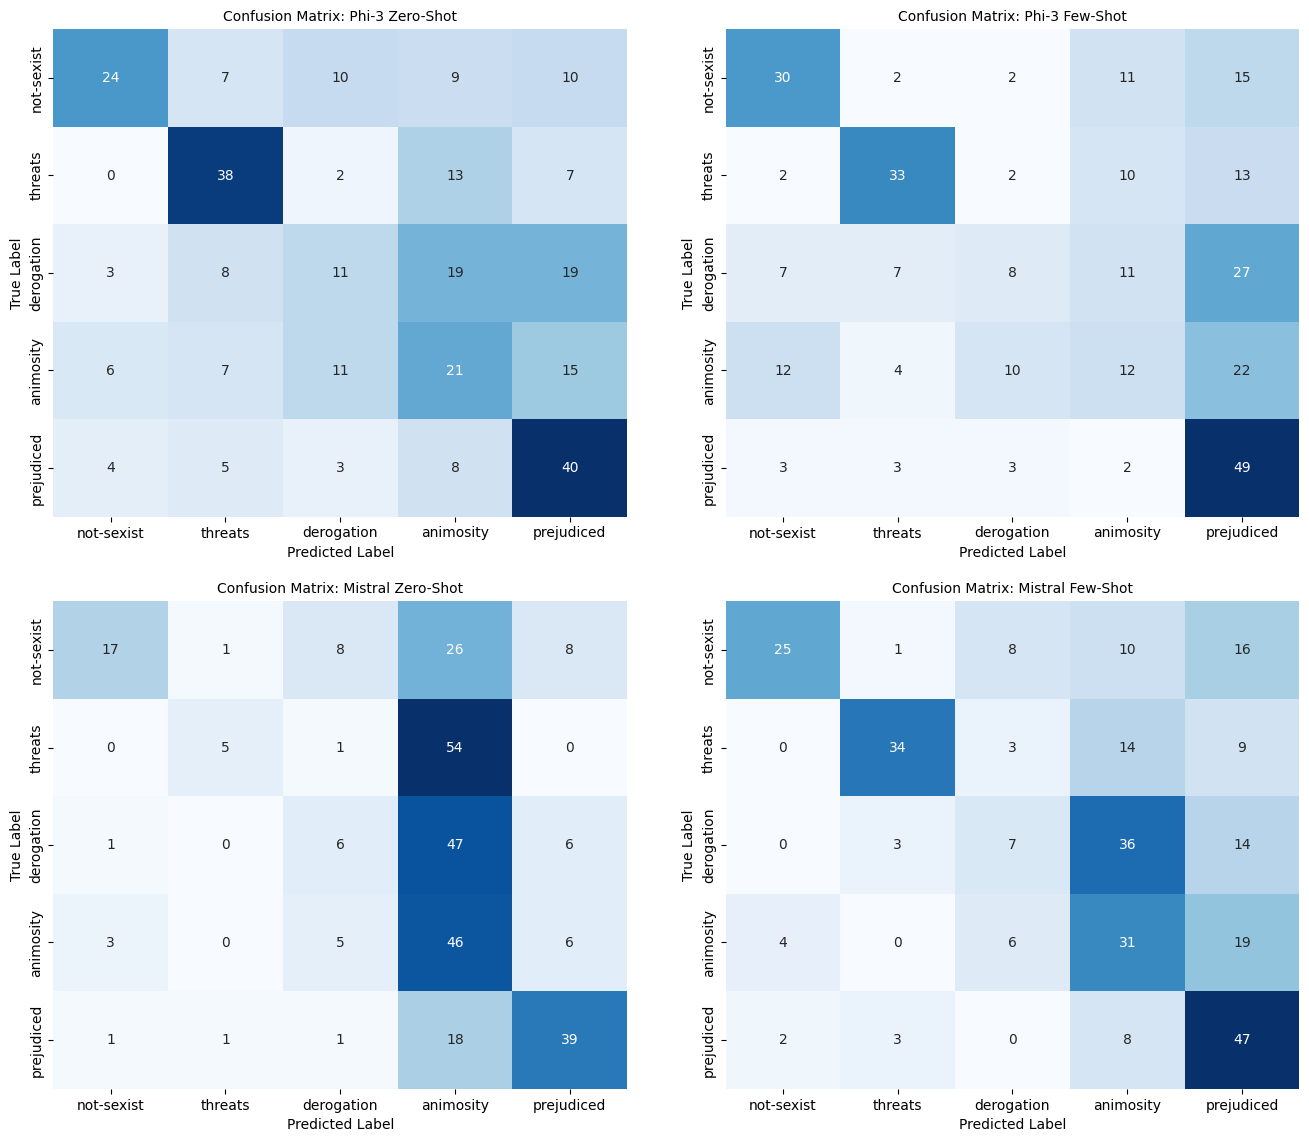

In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Setup Data & Labels
y_true = test_df['label'].tolist()
label_names = ['not-sexist', 'threats', 'derogation', 'animosity', 'prejudiced']

# 2. Define Plotting Function
def plot_confusion_matrix(y_true, y_pred, model_name, ax):
    """Computes and plots a single confusion matrix."""
    # Force the confusion matrix to be 5x5 even if some classes are not predicted
    cm = confusion_matrix(y_true, y_pred, labels=np.arange(len(label_names)))

    # Calculate row-wise normalization (Percentage of true class)

    cm_normalized = cm.astype('float') / (cm.sum(axis=1)[:, np.newaxis] + 1e-10)

    sns.heatmap(
        cm_normalized,
        annot=cm, # Display raw counts inside the box
        fmt='d',
        cmap='Blues',
        cbar=False,
        xticklabels=label_names,
        yticklabels=label_names,
        ax=ax
    )
    ax.set_title(f'Confusion Matrix: {model_name}', fontsize=10)
    ax.set_ylabel('True Label')
    ax.set_xlabel('Predicted Label')

# 3. Get Predictions Directly (Skip conversion, models already output ints)
preds_zs_phi = ALL_ZERO_SHOT_RESULTS['model_1']['predictions']
preds_fs_phi = ALL_FEW_SHOT_RESULTS['model_1']['predictions']
preds_zs_mistral = ALL_ZERO_SHOT_RESULTS['model_2']['predictions']
preds_fs_mistral = ALL_FEW_SHOT_RESULTS['model_2']['predictions']

# 4. Create Plot Layout
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
plt.tight_layout(pad=4.0)

# 5. Plot All Matrices
plot_confusion_matrix(y_true, preds_zs_phi, 'Phi-3 Zero-Shot', axes[0, 0])
plot_confusion_matrix(y_true, preds_fs_phi, 'Phi-3 Few-Shot', axes[0, 1])
plot_confusion_matrix(y_true, preds_zs_mistral, 'Mistral Zero-Shot', axes[1, 0])
plot_confusion_matrix(y_true, preds_fs_mistral, 'Mistral Few-Shot', axes[1, 1])

plt.show()

# [Task 7 - 1.0 points] Report

Wrap up your experiment in a short report (up to 2 pages).

### Instructions

* Use the NLP course report template.
* Summarize each task in the report following the provided template.

### Recommendations

The report is not a copy-paste of graphs, tables, and command outputs.

* Summarize classification performance in Table format.
* **Do not** report command outputs or screenshots.
* Report learning curves in Figure format.
* The error analysis section should summarize your findings.

# Submission

* **Submit** your report in PDF format.
* **Submit** your python notebook.
* Make sure your notebook is **well organized**, with no temporary code, commented sections, tests, etc...

# FAQ

Please check this frequently asked questions before contacting us.

### Model cards

You can pick any open-source model card you like.

We recommend starting from those reported in this assignment.

### Implementation

Everything can be done via ``transformers`` APIs.

However, you are free to test frameworks, such as [LangChain](https://www.langchain.com/), [LlamaIndex](https://www.llamaindex.ai/) [LitParrot](https://github.com/awesome-software/lit-parrot), provided that you correctly address task instructions.

### Task Performance

The task is challenging and zero-shot prompting may show relatively low performance depending on the chosen model.

### Prompt Template

Do not change the provided prompt template.

You are only allowed to change it in case of a possible extension.

### Optimizations

Any kind of code optimization (e.g., speedup model inference or reduce computational cost) is more than welcome!

### Bonus Points

0.5 bonus points are arbitrarily assigned based on significant contributions such as:

- Outstanding error analysis
- Masterclass code organization
- Evaluate A1 dataset and perform comparison
- Perform prompt tuning

Note that bonus points are only assigned if all task points are attributed (i.e., 6/6).

# The End